DỮ LIỆU ĐẦU VÀO VÀ CÁC THƯ VIỆN CẨN SỬ DUNG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

print("--- 🔥 Đang tạo dữ liệu CA_Weather_Fire_Dataset từ 1984–2025 ---")



# === 2️⃣ Thiết lập khoảng thời gian ===
nam_bat_dau = 1984
nam_ket_thuc = 2025

# Hàm tạo danh sách ngày trong từng năm (kể cả năm nhuận)
def tao_ngay_trong_nam(nam):
    start = datetime(nam, 1, 1)
    end = datetime(nam + 1, 1, 1)
    return pd.date_range(start, end - timedelta(days=1), freq='D')

# Gom tất cả ngày từ 1984–2025
ngay_toan_bo = []
for nam in range(nam_bat_dau, nam_ket_thuc + 1):
    ngay_toan_bo.extend(tao_ngay_trong_nam(nam))

so_luong_mau = len(ngay_toan_bo)

# === 3️⃣ Tạo dữ liệu thời gian ===
dates = ngay_toan_bo
years = [d.year for d in dates]
months = [d.month for d in dates]
day_of_year = [d.timetuple().tm_yday for d in dates]

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

seasons = [get_season(m) for m in months]

# === 4️⃣ Sinh dữ liệu thời tiết ===
precipitation = np.round(
    np.random.choice([0, 1], size=so_luong_mau, p=[0.7, 0.3])
    * np.random.uniform(0, 50, so_luong_mau),
    2,
)
max_temp = np.round(np.random.uniform(10, 45, so_luong_mau), 1)
min_temp = np.round(max_temp - np.random.uniform(5, 15, so_luong_mau), 1)
avg_wind_speed = np.round(np.random.uniform(2, 40, so_luong_mau), 1)

temp_range = np.round(max_temp - min_temp, 1)
wind_temp_ratio = np.round(avg_wind_speed / (max_temp + 0.01), 3)

# === 5️⃣ Cột độ trễ ===
lagged_precipitation = np.roll(precipitation, 1)
lagged_avg_wind_speed = np.roll(avg_wind_speed, 1)
lagged_precipitation[0] = 0
lagged_avg_wind_speed[0] = 0

# === 6️⃣ Xác định ngày cháy (FIRE_START_DAY) ===
fire_start = np.where(
    (max_temp > 35)
    & (temp_range > 10)
    & (avg_wind_speed > 20)
    & (precipitation == 0),
    1,
    0,
)

# Thêm nhiễu ngẫu nhiên (10%)
noise = np.random.choice([0, 1], size=so_luong_mau, p=[0.9, 0.1])
fire_start = np.abs(fire_start - noise)

# === 7️⃣ Tạo DataFrame ===
df = pd.DataFrame({
    "DATE": [d.strftime("%Y-%m-%d") for d in dates],
    "PRECIPITATION": precipitation,
    "MAX_TEMP": max_temp,
    "MIN_TEMP": min_temp,
    "AVG_WIND_SPEED": avg_wind_speed,
    "FIRE_START_DAY": fire_start.astype(int),
    "YEAR": years,
    "TEMP_RANGE": temp_range,
    "WIND_TEMP_RATIO": wind_temp_ratio,
    "MONTH": months,
    "SEASON": seasons,
    "LAGGED_PRECIPITATION": lagged_precipitation,
    "LAGGED_AVG_WIND_SPEED": lagged_avg_wind_speed,
    "DAY_OF_YEAR": day_of_year
})

# === 8️⃣ Lưu file CSV (tự tạo thư mục nếu chưa có) ===
output_path = r"D:\OneDrive\Máy tính\nckh\code\test của huấn\dữ liệu thô\CA_Weather_Fire_Dataset_Clean (1).csv"

os.makedirs(os.path.dirname(output_path), exist_ok=True)


# === 9️⃣ Import lại file để kiểm tra ===
imported_df = pd.read_csv(output_path)

print("\n✅ Đã tạo và import dữ liệu thành công!")
print(f"Tổng số dòng: {len(imported_df):,}")
print(f"Giai đoạn: {nam_bat_dau} – {nam_ket_thuc}")
print("\n5 dòng đầu tiên:")
print(imported_df.head())
print("\n📊 Thống kê mô tả:")
print(imported_df.describe())
print(f"\n🔢 Phân bố FIRE_START_DAY:\n{imported_df['FIRE_START_DAY'].value_counts()}")
print(f"\n💾 File CSV được lưu tại: {output_path}")

# === 🔟 Biểu đồ minh họa ===
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=imported_df, x="SEASON", hue="FIRE_START_DAY", palette="coolwarm")
plt.title("🔥 Số ngày cháy rừng theo mùa (1984–2025)")
plt.xlabel("Mùa")
plt.ylabel("Số ngày")
plt.legend(title="FIRE_START_DAY", labels=["Không cháy", "Có cháy"])
plt.show()


--- 🔥 Đang tạo dữ liệu CA_Weather_Fire_Dataset từ 1984–2025 ---


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive\\Máy tính\\nckh\\code\\test của huấn\\dữ liệu thô\\CA_Weather_Fire_Dataset_Clean (1).csv'

TRỰC QUAN HÓA DỮ LIỆU

In [2]:
pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Đang thực hiện phân tích và trực quan hóa dữ liệu ---")

# Đọc file CSV (đổi tên nếu khác)
df = pd.read_csv(r"D:\OneDrive\Máy tính\nckh\code\test của huấn\dữ liệu thô\CA_Weather_Fire_Dataset_Clean (1).csv")


# Hiển thị thông tin tổng quan
print("\n--- Thông tin dữ liệu ---")
print(df.info())
print("\n--- Thống kê mô tả ---")
print(df.describe())
print("\n--- Phân bố giá trị FIRE_START_DAY ---")
print(df["FIRE_START_DAY"].value_counts())

# Đổi tên cột FIRE_START_DAY thành ChayRung cho dễ nhìn khi vẽ biểu đồ
df.rename(columns={"FIRE_START_DAY": "ChayRung"}, inplace=True)

# ==========================================
# 🔹 Biểu đồ Pairplot — trực quan hóa tương quan giữa các biến
# ==========================================
print("\n--- Vẽ biểu đồ phân tán giữa các cặp thuộc tính ---")

# Lấy các cột chính để trực quan
cols = ["MAX_TEMP", "MIN_TEMP", "AVG_WIND_SPEED", "PRECIPITATION", "TEMP_RANGE", "ChayRung"]

sns.pairplot(df[cols], hue='ChayRung', palette='viridis', diag_kind="kde")
plt.suptitle('Biểu đồ phân tán các cặp thuộc tính theo nguy cơ cháy rừng', y=1.02)
plt.show()

# ==========================================
# 🔹 Heatmap tương quan giữa các yếu tố
# ==========================================
print("\n--- Vẽ ma trận tương quan giữa các biến ---")

plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các yếu tố thời tiết và cháy rừng')
plt.show()

# ==========================================
# 🔹 Biểu đồ phân bố nhiệt độ, gió, mưa theo cháy rừng
# ==========================================
print("\n--- Phân bố các yếu tố theo trạng thái cháy rừng ---")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x="ChayRung", y="MAX_TEMP", data=df, ax=axes[0], palette='Reds')
axes[0].set_title("Nhiệt độ tối đa vs Cháy rừng")

sns.boxplot(x="ChayRung", y="AVG_WIND_SPEED", data=df, ax=axes[1], palette='Blues')
axes[1].set_title("Tốc độ gió trung bình vs Cháy rừng")

sns.boxplot(x="ChayRung", y="PRECIPITATION", data=df, ax=axes[2], palette='Greens')
axes[2].set_title("Lượng mưa vs Cháy rừng")

plt.tight_layout()
plt.show()

# ==========================================
# 🔹 Biểu đồ số vụ cháy theo mùa
# ==========================================
print("\n--- Biểu đồ tỷ lệ cháy rừng theo mùa ---")

plt.figure(figsize=(8, 5))
sns.countplot(x="SEASON", hue="ChayRung", data=df, palette='magma')
plt.title("Số vụ cháy rừng theo mùa")
plt.xlabel("Mùa")
plt.ylabel("Số lượng ngày")
plt.legend(["Không cháy", "Có cháy"])
plt.show()

print("\n✅ Hoàn tất Bước 3: Phân tích & trực quan hóa dữ liệu (EDA).")



--- Đang thực hiện phân tích và trực quan hóa dữ liệu ---


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive\\Máy tính\\nckh\\code\\test của huấn\\dữ liệu thô\\CA_Weather_Fire_Dataset_Clean (1).csv'

HUẤN LUYỆN MÔ HÌNH


--- Đang tải dữ liệu ---
Tải dữ liệu thành công!

Các cột trong dữ liệu: ['DATE', 'PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED', 'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH', 'SEASON', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'DAY_OF_YEAR']

--- Đang chuẩn bị dữ liệu ---


Chia dữ liệu thành công (80% huấn luyện, 20% kiểm thử).

--- Đang huấn luyện mô hình Random Forest ---
✅ Huấn luyện mô hình thành công!

--- Đánh giá hiệu quả mô hình ---

🎯 Độ chính xác của mô hình: 70.01%

--- Báo cáo phân loại ---
              precision    recall  f1-score   support

  Không cháy       0.79      0.76      0.77      2004
     Có cháy       0.54      0.58      0.56       994

    accuracy                           0.70      2998
   macro avg       0.67      0.67      0.67      2998
weighted avg       0.71      0.70      0.70      2998



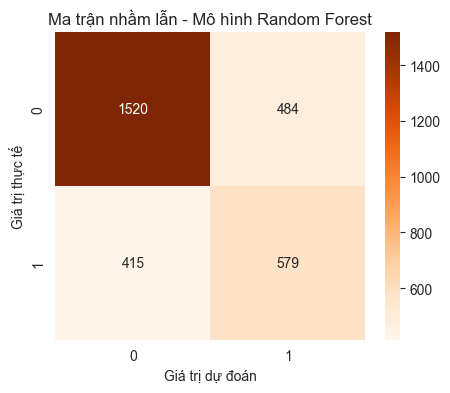


--- Phân tích độ quan trọng của các yếu tố ---


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26096\1371717154.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=do_quan_trong, y=do_quan_trong.index, palette="viridis")


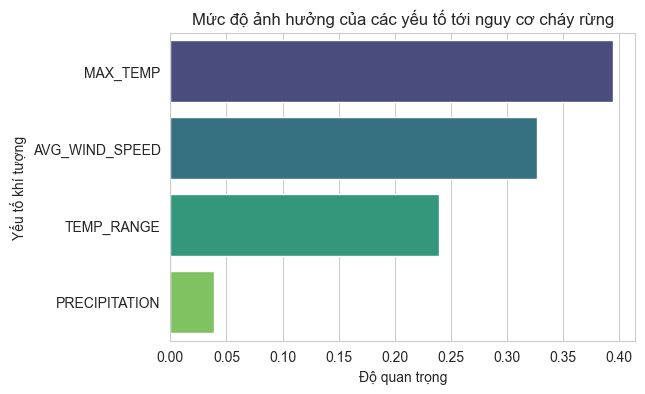


Các yếu tố quan trọng nhất trong mô hình:
MAX_TEMP          0.394494
AVG_WIND_SPEED    0.326504
TEMP_RANGE        0.239801
PRECIPITATION     0.039201
dtype: float64


In [ ]:
# ===== 1️⃣ Import các thư viện cần thiết =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Đang tải dữ liệu ---")
df = pd.read_csv(r"D:\OneDrive\Máy tính\nckh\code\test của huấn\dữ liệu thô\CA_Weather_Fire_Dataset_Clean (1).csv")
print("Tải dữ liệu thành công!")
print("\nCác cột trong dữ liệu:", df.columns.tolist())


# ===== 2️⃣ Chuẩn bị dữ liệu =====
print("\n--- Đang chuẩn bị dữ liệu ---")
# Chọn các đặc trưng đầu vào (biến độc lập) và biến mục tiêu (phụ thuộc)
X = df[["MAX_TEMP", "PRECIPITATION", "AVG_WIND_SPEED", "TEMP_RANGE"]]
y = df["FIRE_START_DAY"]

# Chia dữ liệu thành 2 phần: train (80%) và test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Chia dữ liệu thành công (80% huấn luyện, 20% kiểm thử).")

# ===== 3️⃣ Huấn luyện mô hình Random Forest =====
print("\n--- Đang huấn luyện mô hình Random Forest ---")
mo_hinh = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
mo_hinh.fit(X_train, y_train)
print("✅ Huấn luyện mô hình thành công!")

# ===== 4️⃣ Đánh giá mô hình =====
print("\n--- Đánh giá hiệu quả mô hình ---")
y_du_doan = mo_hinh.predict(X_test)

print(f"\n🎯 Độ chính xác của mô hình: {round(accuracy_score(y_test, y_du_doan)*100, 2)}%")

print("\n--- Báo cáo phân loại ---")
print(classification_report(y_test, y_du_doan, target_names=["Không cháy", "Có cháy"]))

# Ma trận nhầm lẫn
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_du_doan), annot=True, fmt="d", cmap="Oranges")
plt.title("Ma trận nhầm lẫn - Mô hình Random Forest")
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

# ===== 5️⃣ Độ quan trọng của các yếu tố =====
print("\n--- Phân tích độ quan trọng của các yếu tố ---")
do_quan_trong = pd.Series(mo_hinh.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=do_quan_trong, y=do_quan_trong.index, palette="viridis")
plt.title("Mức độ ảnh hưởng của các yếu tố tới nguy cơ cháy rừng")
plt.xlabel("Độ quan trọng")
plt.ylabel("Yếu tố khí tượng")
plt.show()

print("\nCác yếu tố quan trọng nhất trong mô hình:")
print(do_quan_trong)


CÁC CẤP ĐỘ NGUY CƠ CHÁY RỪNG


--- Đang tính toán mức độ nguy cơ cháy rừng ---

5 dòng dữ liệu đầu tiên:
   YEAR  MAX_TEMP  PRECIPITATION  AVG_WIND_SPEED  Diem_NguyCo CapDo_NguyCo
0  1984      79.0            0.0            4.70    47.900022   Trung bình
1  1984      71.0            0.0            5.59    34.809194   Trung bình
2  1984      70.0            0.0            5.37    32.729301   Trung bình
3  1984      76.0            0.0            4.70    42.544075   Trung bình
4  1984      74.0            0.0            5.14    39.562598   Trung bình

--- Bảng phân bố cấp độ nguy cơ cháy rừng ---
  Cấp độ nguy cơ  Số lượng mẫu
0     Trung bình          9967
1           Thấp          3030
2            Cao          1875
3        Rất cao           104


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19512\3791537267.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bang_tong_hop, x="Cấp độ nguy cơ", y="Số lượng mẫu", palette=["green","gold","orange","red"])


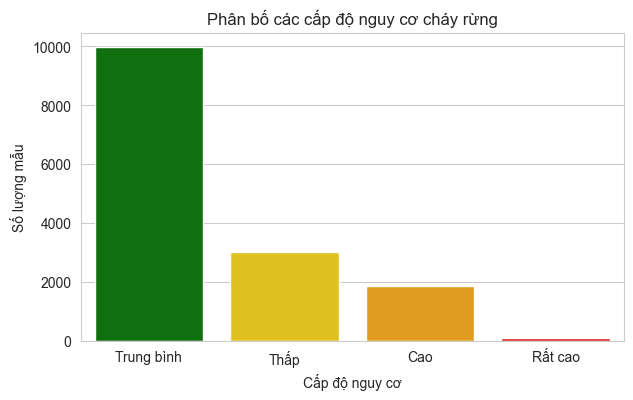


✅ Đã lưu bảng 'Bang_NguyCo_ChayRung.csv' thành công!


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv(r"D:\OneDrive\Máy tính\nckh\code\test của huấn\dữ liệu thô\CA_Weather_Fire_Dataset_Clean (1).csv")

print("\n--- Đang tính toán mức độ nguy cơ cháy rừng ---")

# Tạo điểm nguy cơ cháy rừng dựa trên các yếu tố
# (Bạn có thể điều chỉnh trọng số nếu muốn chính xác hơn)
df["Diem_NguyCo"] = (
    0.4 * df["MAX_TEMP"] +       # Nhiệt độ càng cao → nguy cơ càng lớn
    0.3 * df["AVG_WIND_SPEED"] - # Gió mạnh → nguy cơ lan nhanh
    0.3 * df["PRECIPITATION"]    # Mưa nhiều → giảm nguy cơ cháy
)

# Chuẩn hóa điểm về thang 0–100
df["Diem_NguyCo"] = (df["Diem_NguyCo"] - df["Diem_NguyCo"].min()) / \
                         (df["Diem_NguyCo"].max() - df["Diem_NguyCo"].min()) * 100

# Phân loại thành 4 cấp độ nguy cơ
def phan_loai_nguy_co(diem):
    if diem < 25:
        return "Thấp"
    elif diem < 50:
        return "Trung bình"
    elif diem < 75:
        return "Cao"
    else:
        return "Rất cao"

df["CapDo_NguyCo"] = df["Diem_NguyCo"].apply(phan_loai_nguy_co)

# Hiển thị 5 dòng đầu tiên
print("\n5 dòng dữ liệu đầu tiên:")
print(df[["YEAR", "MAX_TEMP", "PRECIPITATION", "AVG_WIND_SPEED", "Diem_NguyCo", "CapDo_NguyCo"]].head())

# Tạo bảng tổng hợp theo cấp độ
bang_tong_hop = df["CapDo_NguyCo"].value_counts().reset_index()
bang_tong_hop.columns = ["Cấp độ nguy cơ", "Số lượng mẫu"]

print("\n--- Bảng phân bố cấp độ nguy cơ cháy rừng ---")
print(bang_tong_hop)

# Vẽ biểu đồ phân bố
plt.figure(figsize=(7,4))
sns.barplot(data=bang_tong_hop, x="Cấp độ nguy cơ", y="Số lượng mẫu", palette=["green","gold","orange","red"])
plt.title("Phân bố các cấp độ nguy cơ cháy rừng")
plt.xlabel("Cấp độ nguy cơ")
plt.ylabel("Số lượng mẫu")
plt.show()

# Lưu bảng ra file CSV
df.to_csv("Bang_NguyCo_ChayRung.csv", index=False)
print("\n✅ Đã lưu bảng 'Bang_NguyCo_ChayRung.csv' thành công!")
